# Introducción a Python para IA.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual
import matem
import sympy

# Álgebra lineal.

## Espacios vectoriales
Se denota $\mathbb{R}^n$ al espacio vectorial de $n$-dimensiones sobre el campo de los números reales.
Cada elemento de este espacio vectorial es un vector definido como $\vec{x} = (x_1, x_2, \dots, x_n)$. 

In [2]:
x = np.array([2, 3]) # Un vector de R^2
x

array([2, 3])

Cada vector se caracteriza por su módulo ($||\vec{x}|| = \sqrt{||x_1||^2 + \dots + ||x_n||^2}$) y su dirección.

In [3]:
np.linalg.norm(x)

3.605551275463989

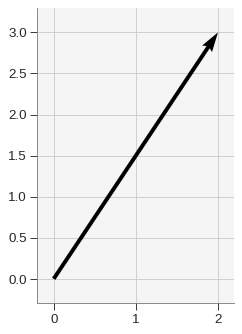

In [6]:
matem.plot_vectors([x], w=0.020)

In [7]:
np.arctan(x[1] / x[0]) * 180 / np.pi

56.309932474020215

## Producto escalar.
$$
\langle \vec{x}, \vec{y} \rangle = \vec{y}^T \cdot \vec{x} = \sum_{i=1}^n x_i y_i
$$

**Propiedades**:
* $\langle \vec{x}, \vec{y} \rangle = 0$ si y solo si $\vec{x}$ y $\vec{y}$ son ortogonales.
* $\langle \vec{x}, \vec{y} \rangle \ge 0$, además $\langle \vec{x}, \vec{y} \rangle = 0$ si y solo si $\vec{x} = 0$
* $\langle \alpha \vec{x}, \vec{y} \rangle = \alpha \langle \vec{x}, \vec{y} \rangle$
* $\langle \vec{x}+\vec{y}, \vec{z} \rangle = \langle \vec{x}, \vec{z} \rangle + \langle \vec{y}, \vec{z} \rangle$
* $\langle \vec{x}, \vec{y} \rangle = \langle \vec{y}, \vec{x} \rangle $
* Desigualdad de Schwarz : $||\langle \vec{x}, \vec{y} \rangle|| \le ||\vec{x}|| ||\vec{y}||$

In [8]:
y = np.array([3,1])

In [9]:
suma = 0.0
for i in range(len(x)):
    suma += x[i] * y[i]
suma

9.0

In [10]:
np.dot(x,y)

9

In [11]:
x @ y

9

In [12]:
z = np.array([-3, 2])

In [13]:
x @ z

0

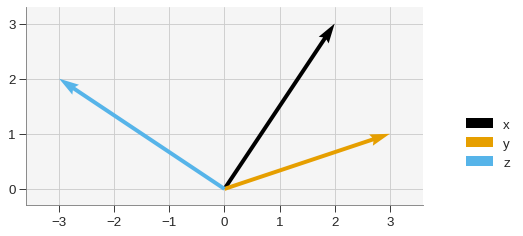

In [14]:
matem.plot_vectors([x, y, z], ['x', 'y', 'z'])

## Independencia lineal.

Los vectores $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_n$ son linealmente independientes si de la ecuación:
$$
\sum_{i=1}^n \alpha_i \vec{x}_i =  0
$$

se deduce que $\alpha_i = 0$, para toda $i$. Si por lo menos una de las $\alpha_i$ es distinta de cero, entonces los vectores son **linealmente dependientes**.

En el espacio euclidiano $\mathbb{R}^n$, los vectores $\vec{e}_1 = (1,0,\dots,0)$, $\vec{e}_2 = (0,1,\dots,0), \dots, \vec{e}_n = (0,0,\dots,n)$, son linealmente independientes y representan una base ortonormal. Además, cualquier vector $\vec{x} \in \mathbb{R}^n$ se puede representar como 
$$
\vec{x} = \sum_{i=1}^n \vec{x}_i \vec{e}_i
$$

In [15]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])
print(e1, e2)

[1 0] [0 1]


In [16]:
x

array([2, 3])

In [17]:
xs = e1 * 2 + e2 * 3
xs

array([2, 3])

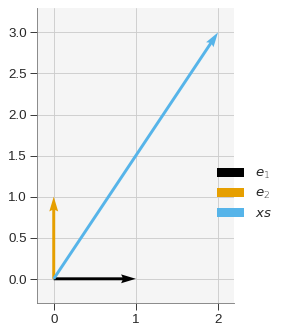

In [20]:
matem.plot_vectors([e1, e2, xs], ['$e_1$', '$e_2$', '$xs$'], w=0.015)

## Normas

Una función $||\cdot ||$  de vectores se denomina norma vectorial si para cualesquiera dos vectores $\vec{x}$ y $\vec{y}$ de $\mathbb{R}^n$ se satisfacen los siguiente axiomas:

* $||\vec{x} || \ge 0$
* $||\vec{x} || = 0 \iff \vec{x} = 0$
* $||a\vec{x} || = |a| || \vec{x} ||$
* $||\vec{x} + \vec{y}|| \le ||\vec{x} || + ||\vec{y}||$ (desigualdad triangular)

Sea $p \ge 1$. Las normas de Hölder, o $p$-normas, se definen por:

$$
||\vec{x}||_p = \left( \sum_{i=1}^n |x_i|^p \right)^{1/p} 
$$

* **Norma 1**:
$
||\vec{x}||_1 = \sum_{i=1}^n |x_i|
$
* **Norma 2 (Euclideana)**:
$
||\vec{x}||_2 = \left( \sum_{i=1}^n |x_i|^2 \right)^{1/2} = \langle \vec{x}, \vec{x} \rangle^{1/2} = (\vec{x}^T \cdot \vec{x})^{1/2}
$

* **Norma infinita**:
$
||\vec{x}||_\infty = \max_{i \le 1 \le n} |x_i|
$

In [21]:
print(x, y, z)

[2 3] [3 1] [-3  2]


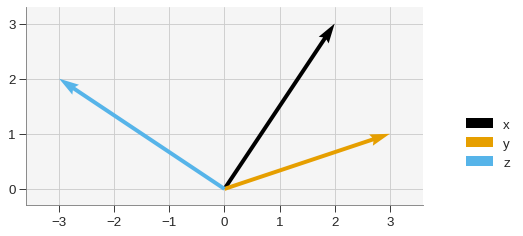

In [22]:
matem.plot_vectors([x, y, z], ['x', 'y', 'z'])

In [23]:
print(np.linalg.norm(x, 1))
print(np.linalg.norm(y, 1))
print(np.linalg.norm(z, 1))

5.0
4.0
5.0


In [24]:
print(np.linalg.norm(x, 2))
print(np.linalg.norm(y, 2))
print(np.linalg.norm(z, 2))

3.605551275463989
3.1622776601683795
3.605551275463989


In [25]:
print(np.linalg.norm(x, np.infty))
print(np.linalg.norm(y, np.infty))
print(np.linalg.norm(z, np.infty))

3.0
3.0
3.0


In [26]:
print(np.linalg.norm(x, -np.infty))
print(np.linalg.norm(y, -np.infty))
print(np.linalg.norm(z, -np.infty))

2.0
1.0
2.0


## Matrices


Sea $A = {a_{ij}}$ una matriz de $n \times n$, donde $n$ indica la dimensión de la matriz ($n$ renglones por $n$ columnas). Los números $a_{ij}$ son los elementos de la matriz, y $i,j = 1,\dots,n$. La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

$$
A = 
\left(
\begin{array}{cccc}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots& \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}\\
\end{array}
\right)
\,\,\,\,
A^T = 
\left(
\begin{array}{cccc}
a_{11} & a_{21} & \dots & a_{n1}\\
a_{12} & a_{22} & \dots & a_{n2}\\
\vdots & \vdots& \ddots & \vdots \\
a_{1n} & a_{2n} & \dots & a_{nn}\\
\end{array}
\right)
$$


In [27]:
A = np.arange(16).reshape(4,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [28]:
A.T

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

Las siguiente definiciones son válidas para $a_{ij} \in \mathbb{R}^n$.

* Se denota $I$ a la matriz identidad (todas sus entradas son cero excepto en la diagonal donde sus entradas son 1).

In [29]:
I = np.eye(4)
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

* La matriz inversa de $A$ se denota por $A^{-1}$ y es tal que $A^{-1}A = I$, donde 

In [30]:
A = np.array([[2, 3, 5],
              [1, -4, 8],
              [8, 6, 3]])
Ainv = np.linalg.inv(A)
Ainv

array([[-0.23715415,  0.08300395,  0.17391304],
       [ 0.24110672, -0.13438735, -0.04347826],
       [ 0.15019763,  0.04743083, -0.04347826]])

In [31]:
np.dot(A, Ainv)

array([[ 1.00000000e+00, -6.93889390e-18,  2.77555756e-17],
       [ 2.22044605e-16,  1.00000000e+00,  0.00000000e+00],
       [ 8.32667268e-17,  3.46944695e-17,  1.00000000e+00]])

* Una matriz $A = {a_{ij}}$ se llama diagonal si $a_{ij}=0, \forall i \ne j$ y se denota por $A = \mbox{diag} ( {a_{ii}}) $.

In [32]:
np.diagonal(A)

array([ 2, -4,  3])

In [33]:
np.diagonal(A, 1)

array([3, 8])

In [34]:
np.diagonal(A, -1)

array([1, 6])

* Una matriz $A = {a_{ij}}$ se llama triangular superior si $a_{ij} = 0, \forall i > j$ y triangular inferior si $a_{ij} = 0, \forall i < j$.

In [35]:
np.triu(A)

array([[ 2,  3,  5],
       [ 0, -4,  8],
       [ 0,  0,  3]])

In [36]:
np.tril(A)

array([[ 2,  0,  0],
       [ 1, -4,  0],
       [ 8,  6,  3]])

* Una matriz $A$ es simétrica si $A^T = A$ y antisimétrica si $A^T = -A$.

In [37]:
B = np.array([[2, 3, 5],
              [3, -4, 8],
              [5, 8, 3]])
B

array([[ 2,  3,  5],
       [ 3, -4,  8],
       [ 5,  8,  3]])

In [38]:
B.T

array([[ 2,  3,  5],
       [ 3, -4,  8],
       [ 5,  8,  3]])

In [39]:
def isSymmetric(mat):
    transmat = np.array(mat).transpose()
    if np.array_equal(mat, transmat):
        return True
    return False

In [40]:
isSymmetric(B)

True

In [41]:
isSymmetric(A)

False

* Una matriz $A$ es ortogonal si $A^T A = I$, o equivalentemente $A^T = A^{-1}$.

In [42]:
x = sympy.symbols('x')

# Matriz rotación
rotation = sympy.Matrix([[sympy.cos(x), -sympy.sin(x)],
                        [sympy.sin(x), sympy.cos(x)]])
rotation

Matrix([
[cos(x), -sin(x)],
[sin(x),  cos(x)]])

In [43]:
rotation.T

Matrix([
[ cos(x), sin(x)],
[-sin(x), cos(x)]])

In [44]:
rotation * rotation.T

Matrix([
[sin(x)**2 + cos(x)**2,                     0],
[                    0, sin(x)**2 + cos(x)**2]])

In [45]:
sympy.simplify(rotation.T*rotation)

Matrix([
[1, 0],
[0, 1]])

In [56]:
rotation.subs('x', np.pi * 0.5).evalf(14)

Matrix([
[6.1232339957368e-17,                -1.0],
[                1.0, 6.1232339957368e-17]])

In [61]:
t1 = sympy.Matrix([3,4])

t2 = rotation.subs('x', np.pi * 0.5).evalf(14) * t1

print(t1)
print(t2)

Matrix([[3], [4]])
Matrix([[-4.0000000000000], [3.0000000000000]])


In [62]:
np.array(t1, dtype=float).reshape(2,)

array([3., 4.])

In [63]:
np.array(t2, dtype=float).reshape(2,)

array([-4.,  3.])

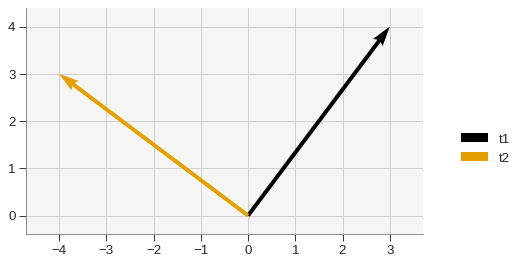

In [64]:
matem.plot_vectors([np.array(t1, dtype=float).reshape(2,), 
                    np.array(t2, dtype=float).reshape(2,)],
                  ['t1', 't2'])

* Cada par de renglones o de columnas de una matriz ortogonal, son ortogonales entre sí. Además la longitud de cada columna o renglón es igual a 1.

In [65]:
C = np.array([[1/3, 2/3, -2/3],
              [-2/3, 2/3, 1/3],
              [2/3, 1/3, 2/3]])
C

array([[ 0.33333333,  0.66666667, -0.66666667],
       [-0.66666667,  0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333,  0.66666667]])

In [66]:
np.dot(C, C.T)

array([[ 1.00000000e+00, -1.54197642e-17,  2.46716228e-17],
       [-1.54197642e-17,  1.00000000e+00, -1.23358114e-17],
       [ 2.46716228e-17, -1.23358114e-17,  1.00000000e+00]])

In [67]:
np.dot(C[0], C[1])

0.0

In [68]:
np.dot(C[:,0], C[:,1])

0.0

In [69]:
np.linalg.norm(C[2])

1.0

In [70]:
np.linalg.norm(C[:, 2])

1.0

* Una matriz $A$ se denomina **positiva definida** si $\langle A\vec{x}, \vec{x}\rangle = \vec{x}^T A\vec{x} > 0$ para cualquier vector no nulo $\vec{x}$ de $\mathbb{R}$. La matriz se llama **positiva semidefinida** si $\vec{x}^T A\vec{x} \ge 0$ para cualquier vector $\vec{x}$ de $\mathbb{R}$. Recordemos que:
$$
\vec{x}^T A\vec{x} = \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j
$$

### Sistema lineal

Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array}
$$

En términos de un sistema lineal, las dos ecuaciones anteriores se escriben como sigue:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular $\vec{x}^T A\vec{x}$ para este ejemplo como sigue:

In [71]:
x, y = sympy.symbols('x y')
X = sympy.Matrix([x, y])
A = sympy.Matrix([[3, 2], [2, 6]])
print(A, type(A))

Matrix([[3, 2], [2, 6]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>


In [72]:
pos_def = X.T @ A @ X
pos_def

Matrix([[x*(3*x + 2*y) + y*(2*x + 6*y)]])

In [73]:
print(pos_def, type(pos_def))

Matrix([[x*(3*x + 2*y) + y*(2*x + 6*y)]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>


In [74]:
sympy.simplify(pos_def)

Matrix([[3*x**2 + 4*x*y + 6*y**2]])

Observamos que `pos_def` es una función cuadrática (positiva) que se puede graficar como sigue:

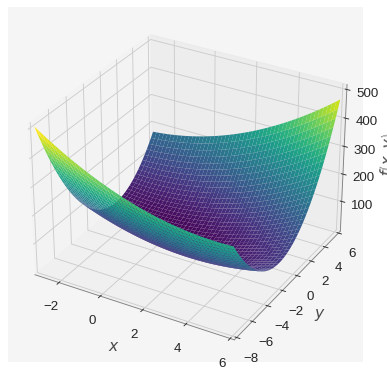

In [75]:
sympy.plotting.plot3d(pos_def[0], (x, -3, 6), (y, -8, 6))

Tranformamos a `numpy` y `matplotlib` para mayor interactividad:

In [76]:
xg, yg = np.meshgrid(np.linspace(-3,8,15), np.linspace(-8,3,15))
g = sympy.lambdify(X, pos_def[0])
W = np.array([g(x1, y1) for x1,y1 in zip(xg,yg)])

In [77]:
matem.graf_surfi(xg, yg, W)

interactive(children=(FloatSlider(value=5.0, description='elev', max=180.0, step=5.0), FloatSlider(value=0.0, …

Se puede demostrar que la matriz $A$ es definida positiva.

Veamos ahora el siguiente ejemplo:

$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.30 x + 20
\end{array}
$$

Sistema lineal.

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.30 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

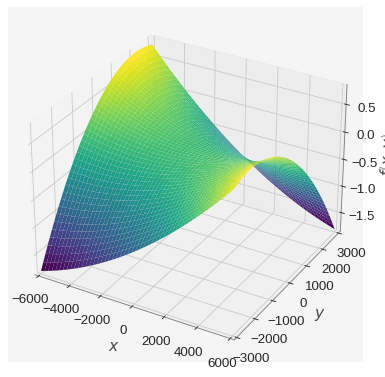

In [78]:
Y = sympy.Matrix([x, y])
B = sympy.Matrix([[0.10, -1], [0.30, -1]])

pos_indef_B = X.T @ B @ X

sympy.plotting.plot3d(pos_indef_B[0], (x, -6000, 6000), (y, -3000, 3000))

In [79]:
xgB, ygB = np.meshgrid(np.linspace(-6000,6000,40), np.linspace(-3000,3000,40))
gB = sympy.lambdify(Y, pos_indef_B[0])
WB = np.array([gB(x1, y1) for x1,y1 in zip(xgB,ygB)])
matem.graf_surfi(xgB, ygB, WB)

interactive(children=(FloatSlider(value=5.0, description='elev', max=180.0, step=5.0), FloatSlider(value=0.0, …

### Eigenvalores y Eigenvectores

Si $A$ es una matriz cuadrada, entonces definimos el número $\lambda$ (real o complejo) como **autovalor** (**valor propio** o **eigenvalor**) de $A$ si $A\vec{u} = \lambda \vec{u}$, o equivalentemente si $det(A - \lambda I) = 0$. El vector $\vec{u}$ se llama autovector (vector propio o eigenvector) de $A$. El conjunto de todos los autovalores de la matriz $A$ se denomina espectro de $A$.

In [80]:
A

Matrix([
[3, 2],
[2, 6]])

In [81]:
def eigen_land(Mat):
    # Cálculo de eigenvectores
    w, v = np.linalg.eig(Mat)  # w: eigenvalues, v: eigenvectors

    # Impresión de los eigenvalores y eigenvectores
    print('eigenvalores = {}'.format(w))
    print('eigenvectores:\n {} \n {}'.format(v[:,0], v[:,1]))

    # Cálculo del ángulo entre los vectores.
    e0 = v[:,0] / np.linalg.norm(v[:,0])
    e1 = v[:,1] / np.linalg.norm(v[:,1])
    angulo = np.arccos(np.dot(e0, e1)) * 180 / np.pi
    print('ángulo entre eigenvectores = {}'.format(angulo)) 
    
    return w, v

In [82]:
wA, vA = eigen_land(np.array(A, dtype=float))

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
ángulo entre eigenvectores = 90.0


In [83]:
B

Matrix([
[0.1, -1],
[0.3, -1]])

In [84]:
wB, vB = eigen_land(np.array(B, dtype=float))

eigenvalores = [-0.4 -0.5]
eigenvectores:
 [0.89442719 0.4472136 ] 
 [0.85749293 0.51449576]
ángulo entre eigenvectores = 4.398705354995508


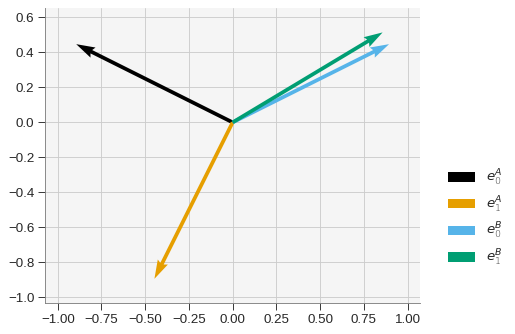

In [85]:
matem.plot_vectors([vA[:,0], vA[:,1], vB[:,0], vB[:,1]], ['$e_0^A$','$e_1^A$','$e_0^B$','$e_1^B$'])

Recordemos que: $A\vec{u} = \lambda \vec{u}$

In [86]:
u = vA[:,0]
v1 = np.array(A, dtype=float) @ u
v1

array([-1.78885438,  0.89442719])

In [87]:
wA[0] * u

array([-1.78885438,  0.89442719])

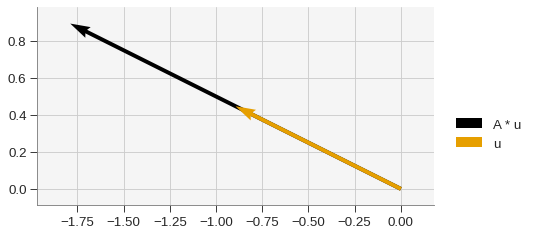

In [88]:
matem.plot_vectors([v1, u], ['A * u','u'])

### Forma cuadrática

Recordemos la forma cuadrática:

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


In [89]:
b = sympy.Matrix([2, -8])
X = sympy.Matrix([x, y])

In [90]:
print(b, type(b))
print(X, type(X))

Matrix([[2], [-8]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>
Matrix([[x], [y]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>


In [91]:
A

Matrix([
[3, 2],
[2, 6]])

In [92]:
b

Matrix([
[ 2],
[-8]])

In [93]:
X

Matrix([
[x],
[y]])

Calculando la forma cuadrática con **sympy**.

$$ 
f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c 
$$


In [94]:
f = 0.5 * X.T @ A @ X - X.T @ b
f

Matrix([[x*(1.5*x + 1.0*y) - 2*x + y*(1.0*x + 3.0*y) + 8*y]])

In [95]:
sympy.simplify(f)

Matrix([[1.5*x**2 + 2.0*x*y - 2.0*x + 3.0*y**2 + 8.0*y]])

Observamos que $f$ es una función cuadrática positiva. 

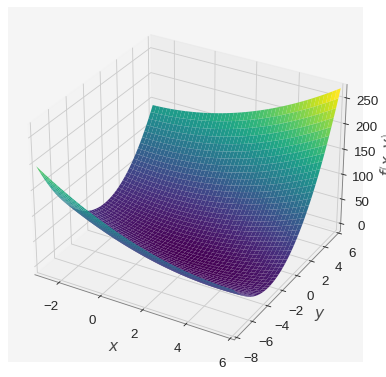

In [96]:
sympy.plotting.plot3d(f[0], (x, -3, 6), (y, -8, 6))

In [97]:
xg, yg = np.meshgrid(np.linspace(-3,8,15), np.linspace(-8,3,15))
g = sympy.lambdify(X, f[0])
W = np.array([g(x1, y1) for x1,y1 in zip(xg,yg)])
matem.graf_surfi(xg, yg, W)

interactive(children=(FloatSlider(value=5.0, description='elev', max=180.0, step=5.0), FloatSlider(value=0.0, …

El gradiente de $f$ es $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $

In [98]:
fp = A @ X - b
fp

Matrix([
[3*x + 2*y - 2],
[2*x + 6*y + 8]])

In [99]:
print(fp) 
print(type(fp))

Matrix([[3*x + 2*y - 2], [2*x + 6*y + 8]])
<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [100]:
print(fp[0], type(fp[0]))
print(fp[1], type(fp[1]))

3*x + 2*y - 2 <class 'sympy.core.add.Add'>
2*x + 6*y + 8 <class 'sympy.core.add.Add'>


Otra manera de calcular el gradiente es como sigue:

In [101]:
Df = sympy.Matrix(f).jacobian(X)
Df

Matrix([[3.0*x + 2.0*y - 2, 2.0*x + 6.0*y + 8]])

In [102]:
print(Df)
print(type(Df))

Matrix([[3.0*x + 2.0*y - 2, 2.0*x + 6.0*y + 8]])
<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [103]:
print(Df[0], type(Df[0]))
print(Df[1], type(Df[1]))

3.0*x + 2.0*y - 2 <class 'sympy.core.add.Add'>
2.0*x + 6.0*y + 8 <class 'sympy.core.add.Add'>


Para ver cómo se comporta el gradiente de $f$, usemos **matplotlib**:

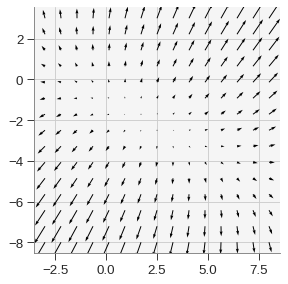

In [104]:
f1 = sympy.lambdify(X, Df[0])
f2 = sympy.lambdify([x, y], Df[1])

U=[f1(x1, y1) for x1,y1 in zip(xg,yg)]
V=[f2(x1,y1) for x1,y1 in zip(xg,yg)]

fig = plt.figure(figsize=(6,4))
plt.quiver(xg,yg,U,V)
plt.gca().set_aspect('equal')
plt.show()

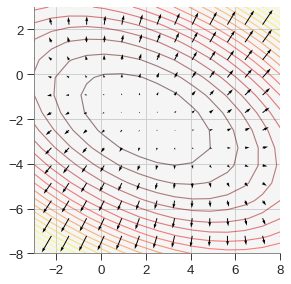

In [105]:
fig = plt.figure(figsize=(6,4))
plt.contour(xg, yg, W, levels=20, linewidths = 1.0, cmap='hot',alpha=0.5)
plt.quiver(xg, yg, U, V,zorder=5)
plt.gca().set_aspect('equal')
plt.show()

### Inversa

$$
\left[
\begin{array}{ccc}
1 & 2 & 3 \\
3 & 6 & 2 \\
2 & 0 & 1
\end{array}
\right] 
\left[ 
\begin{array}{c}
x \\ y \\ z 
\end{array}
\right]
= 
\left[ 
\begin{array}{c}
1 \\ 2 \\ 3 
\end{array}
\right]
$$

In [106]:
M = sympy.Matrix([[1, 2, 3], [3, 6, 2], [2, 0, 1]])
M

Matrix([
[1, 2, 3],
[3, 6, 2],
[2, 0, 1]])

In [107]:
MI = M.inv()
MI

Matrix([
[-3/14, 1/14,  1/2],
[-1/28, 5/28, -1/4],
[  3/7, -1/7,    0]])

In [108]:
M * MI

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [109]:
b = sympy.Matrix([1, 2, 3])
b

Matrix([
[1],
[2],
[3]])

In [110]:
sol = MI * b 
sol

Matrix([
[10/7],
[-3/7],
[ 1/7]])

In [111]:
M * sol

Matrix([
[1],
[2],
[3]])

### Descomposición LU

In [112]:
L, U, perm = M.LUdecomposition()
L

Matrix([
[1, 0, 0],
[2, 1, 0],
[3, 0, 1]])

In [113]:
U

Matrix([
[1,  2,  3],
[0, -4, -5],
[0,  0, -7]])

In [114]:
perm

[[1, 2]]

In [115]:
L * U

Matrix([
[1, 2, 3],
[2, 0, 1],
[3, 6, 2]])

In [116]:
M

Matrix([
[1, 2, 3],
[3, 6, 2],
[2, 0, 1]])

In [117]:
b

Matrix([
[1],
[2],
[3]])

In [118]:
sol_LU = M.LUsolve(b)
sol_LU

Matrix([
[10/7],
[-3/7],
[ 1/7]])

In [119]:
M * sol_LU

Matrix([
[1],
[2],
[3]])

In [120]:
from scipy.linalg import lu

p, l, u = lu(M)

In [121]:
p

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [122]:
l

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.66666667,  1.        ,  0.        ],
       [ 0.33333333, -0.        ,  1.        ]])

In [123]:
u

array([[ 3.        ,  6.        ,  2.        ],
       [ 0.        , -4.        , -0.33333333],
       [ 0.        ,  0.        ,  2.33333333]])

In [124]:
l @ u

array([[3., 6., 2.],
       [2., 0., 1.],
       [1., 2., 3.]])

### Descomposición QR

In [125]:
Q, R = M.QRdecomposition()

In [126]:
Q

Matrix([
[  sqrt(14)/14,   sqrt(35)/35, 3*sqrt(10)/10],
[3*sqrt(14)/14, 3*sqrt(35)/35,  -sqrt(10)/10],
[   sqrt(14)/7,   -sqrt(35)/7,             0]])

In [127]:
R

Matrix([
[sqrt(14), 10*sqrt(14)/7, 11*sqrt(14)/14],
[       0,  4*sqrt(35)/7,  4*sqrt(35)/35],
[       0,             0,  7*sqrt(10)/10]])

In [128]:
Q * R

Matrix([
[1, 2, 3],
[3, 6, 2],
[2, 0, 1]])

In [129]:
q, r = np.linalg.qr(M)

In [130]:
q

array([[-2.67261242e-01, -1.69030851e-01, -9.48683298e-01],
       [-8.01783726e-01, -5.07092553e-01,  3.16227766e-01],
       [-5.34522484e-01,  8.45154255e-01, -6.66133815e-16]])

In [131]:
r

array([[-3.74165739, -5.34522484, -2.93987366],
       [ 0.        , -3.38061702, -0.6761234 ],
       [ 0.        ,  0.        , -2.21359436]])

In [132]:
q @ r

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.55470011e-16, 1.00000000e+00]])

### Descomposición de Cholesky

In [133]:
L = np.linalg.cholesky(np.array(M, dtype=float))

LinAlgError: Matrix is not positive definite

In [134]:
A

Matrix([
[3, 2],
[2, 6]])

In [135]:
L = np.linalg.cholesky(np.array(A, dtype=float))

In [136]:
L

array([[1.73205081, 0.        ],
       [1.15470054, 2.1602469 ]])

In [137]:
L @ L.T

array([[3., 2.],
       [2., 6.]])